In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [3]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [4]:
data = pd.read_sql('''SELECT * FROM cardano''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


In [5]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [6]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1374 non-null   object 
 1   Symbol      1374 non-null   object 
 2   Date        1374 non-null   object 
 3   High        1374 non-null   float64
 4   Low         1374 non-null   float64
 5   Open        1374 non-null   float64
 6   Close       1374 non-null   float64
 7   Volume      1374 non-null   float64
 8   Marketcap   1374 non-null   float64
 9   Range       1374 non-null   float64
 10  Difference  1374 non-null   float64
dtypes: float64(8), object(3)
memory usage: 118.2+ KB


In [7]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        1374 non-null   object        
 1   Symbol      1374 non-null   object        
 2   Date        1374 non-null   datetime64[ns]
 3   High        1374 non-null   float64       
 4   Low         1374 non-null   float64       
 5   Open        1374 non-null   float64       
 6   Close       1374 non-null   float64       
 7   Volume      1374 non-null   float64       
 8   Marketcap   1374 non-null   float64       
 9   Range       1374 non-null   float64       
 10  Difference  1374 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 118.2+ KB


In [9]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,1374.000000,1374.000000,1374.000000,1374.000000,1.374000e+03,1.374000e+03,1374.000000,1374.000000
mean,0.269807,0.239710,0.255287,0.256313,8.934183e+08,7.603454e+09,0.030097,0.001026
std,0.433523,0.380928,0.408456,0.409691,2.107653e+09,1.303878e+10,0.068164,0.040409
min,0.021050,0.017620,0.018414,0.018539,1.739460e+06,4.806646e+08,0.000613,-0.524062
25%,0.047565,0.044601,0.045898,0.045947,5.014830e+07,1.191263e+09,0.002733,-0.002758
50%,0.090274,0.083164,0.086867,0.087002,1.186742e+08,2.270889e+09,0.006074,0.000072
75%,0.194519,0.172442,0.181374,0.183379,4.875977e+08,5.174547e+09,0.019485,0.002823
max,2.461766,2.013285,2.300190,2.309113,1.914198e+10,7.377224e+10,1.000062,0.365219


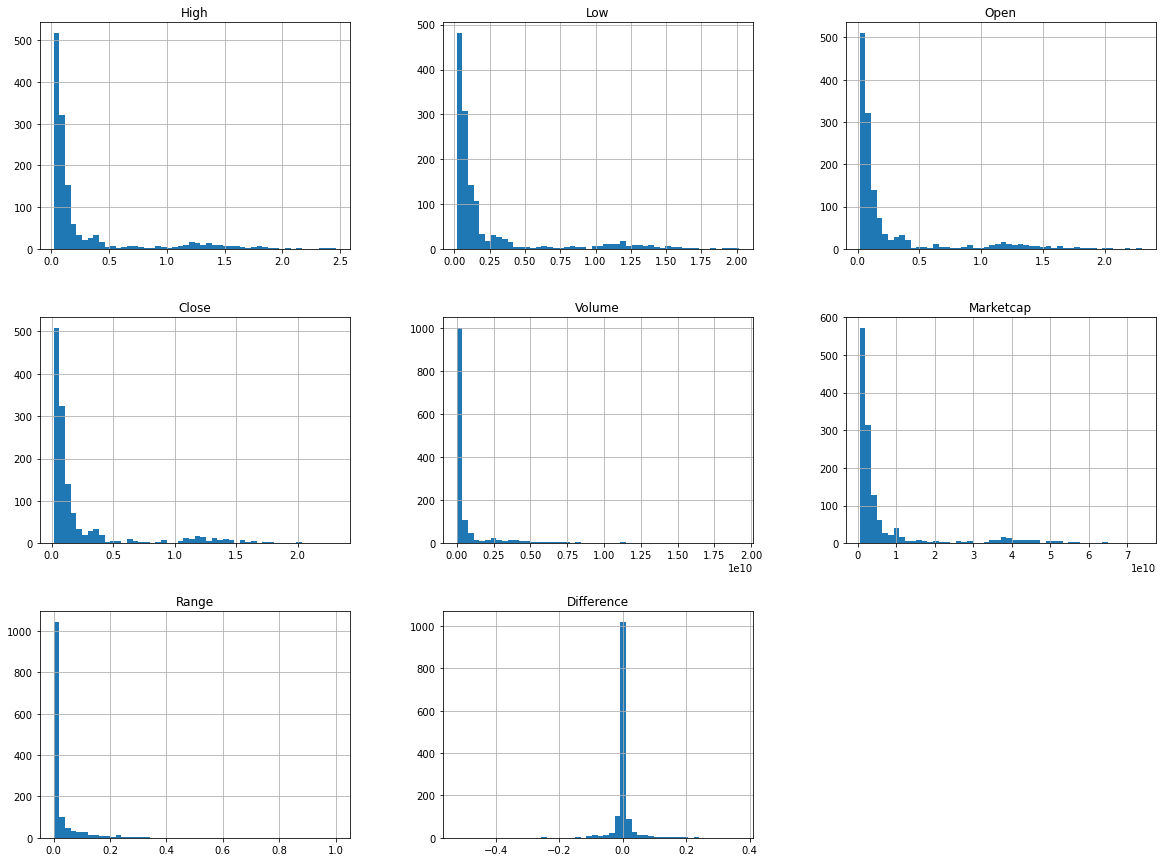

In [10]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [11]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,1325,1323,1327,1358,1318,95,106,1240,1329,1263
Date,2021-05-19 23:59:59,2021-05-17 23:59:59,2021-05-21 23:59:59,2021-06-21 23:59:59,2021-05-12 23:59:59,2018-01-05 23:59:59,2018-01-16 23:59:59,2021-02-23 23:59:59,2021-05-23 23:59:59,2021-03-18 23:59:59
Difference,-0.524062,-0.267964,-0.250317,-0.249548,-0.21073,-0.171591,-0.154128,-0.14406,-0.140243,-0.13941


In [12]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,1319,1326,93,1330,1332,1227,1261,1311,102,1237
Date,2021-05-13 23:59:59,2021-05-20 23:59:59,2018-01-03 23:59:59,2021-05-24 23:59:59,2021-05-26 23:59:59,2021-02-10 23:59:59,2021-03-16 23:59:59,2021-05-05 23:59:59,2018-01-12 23:59:59,2021-02-20 23:59:59
Difference,0.365219,0.338508,0.299979,0.233248,0.228239,0.22677,0.209711,0.204543,0.201739,0.195496


In [13]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [15]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

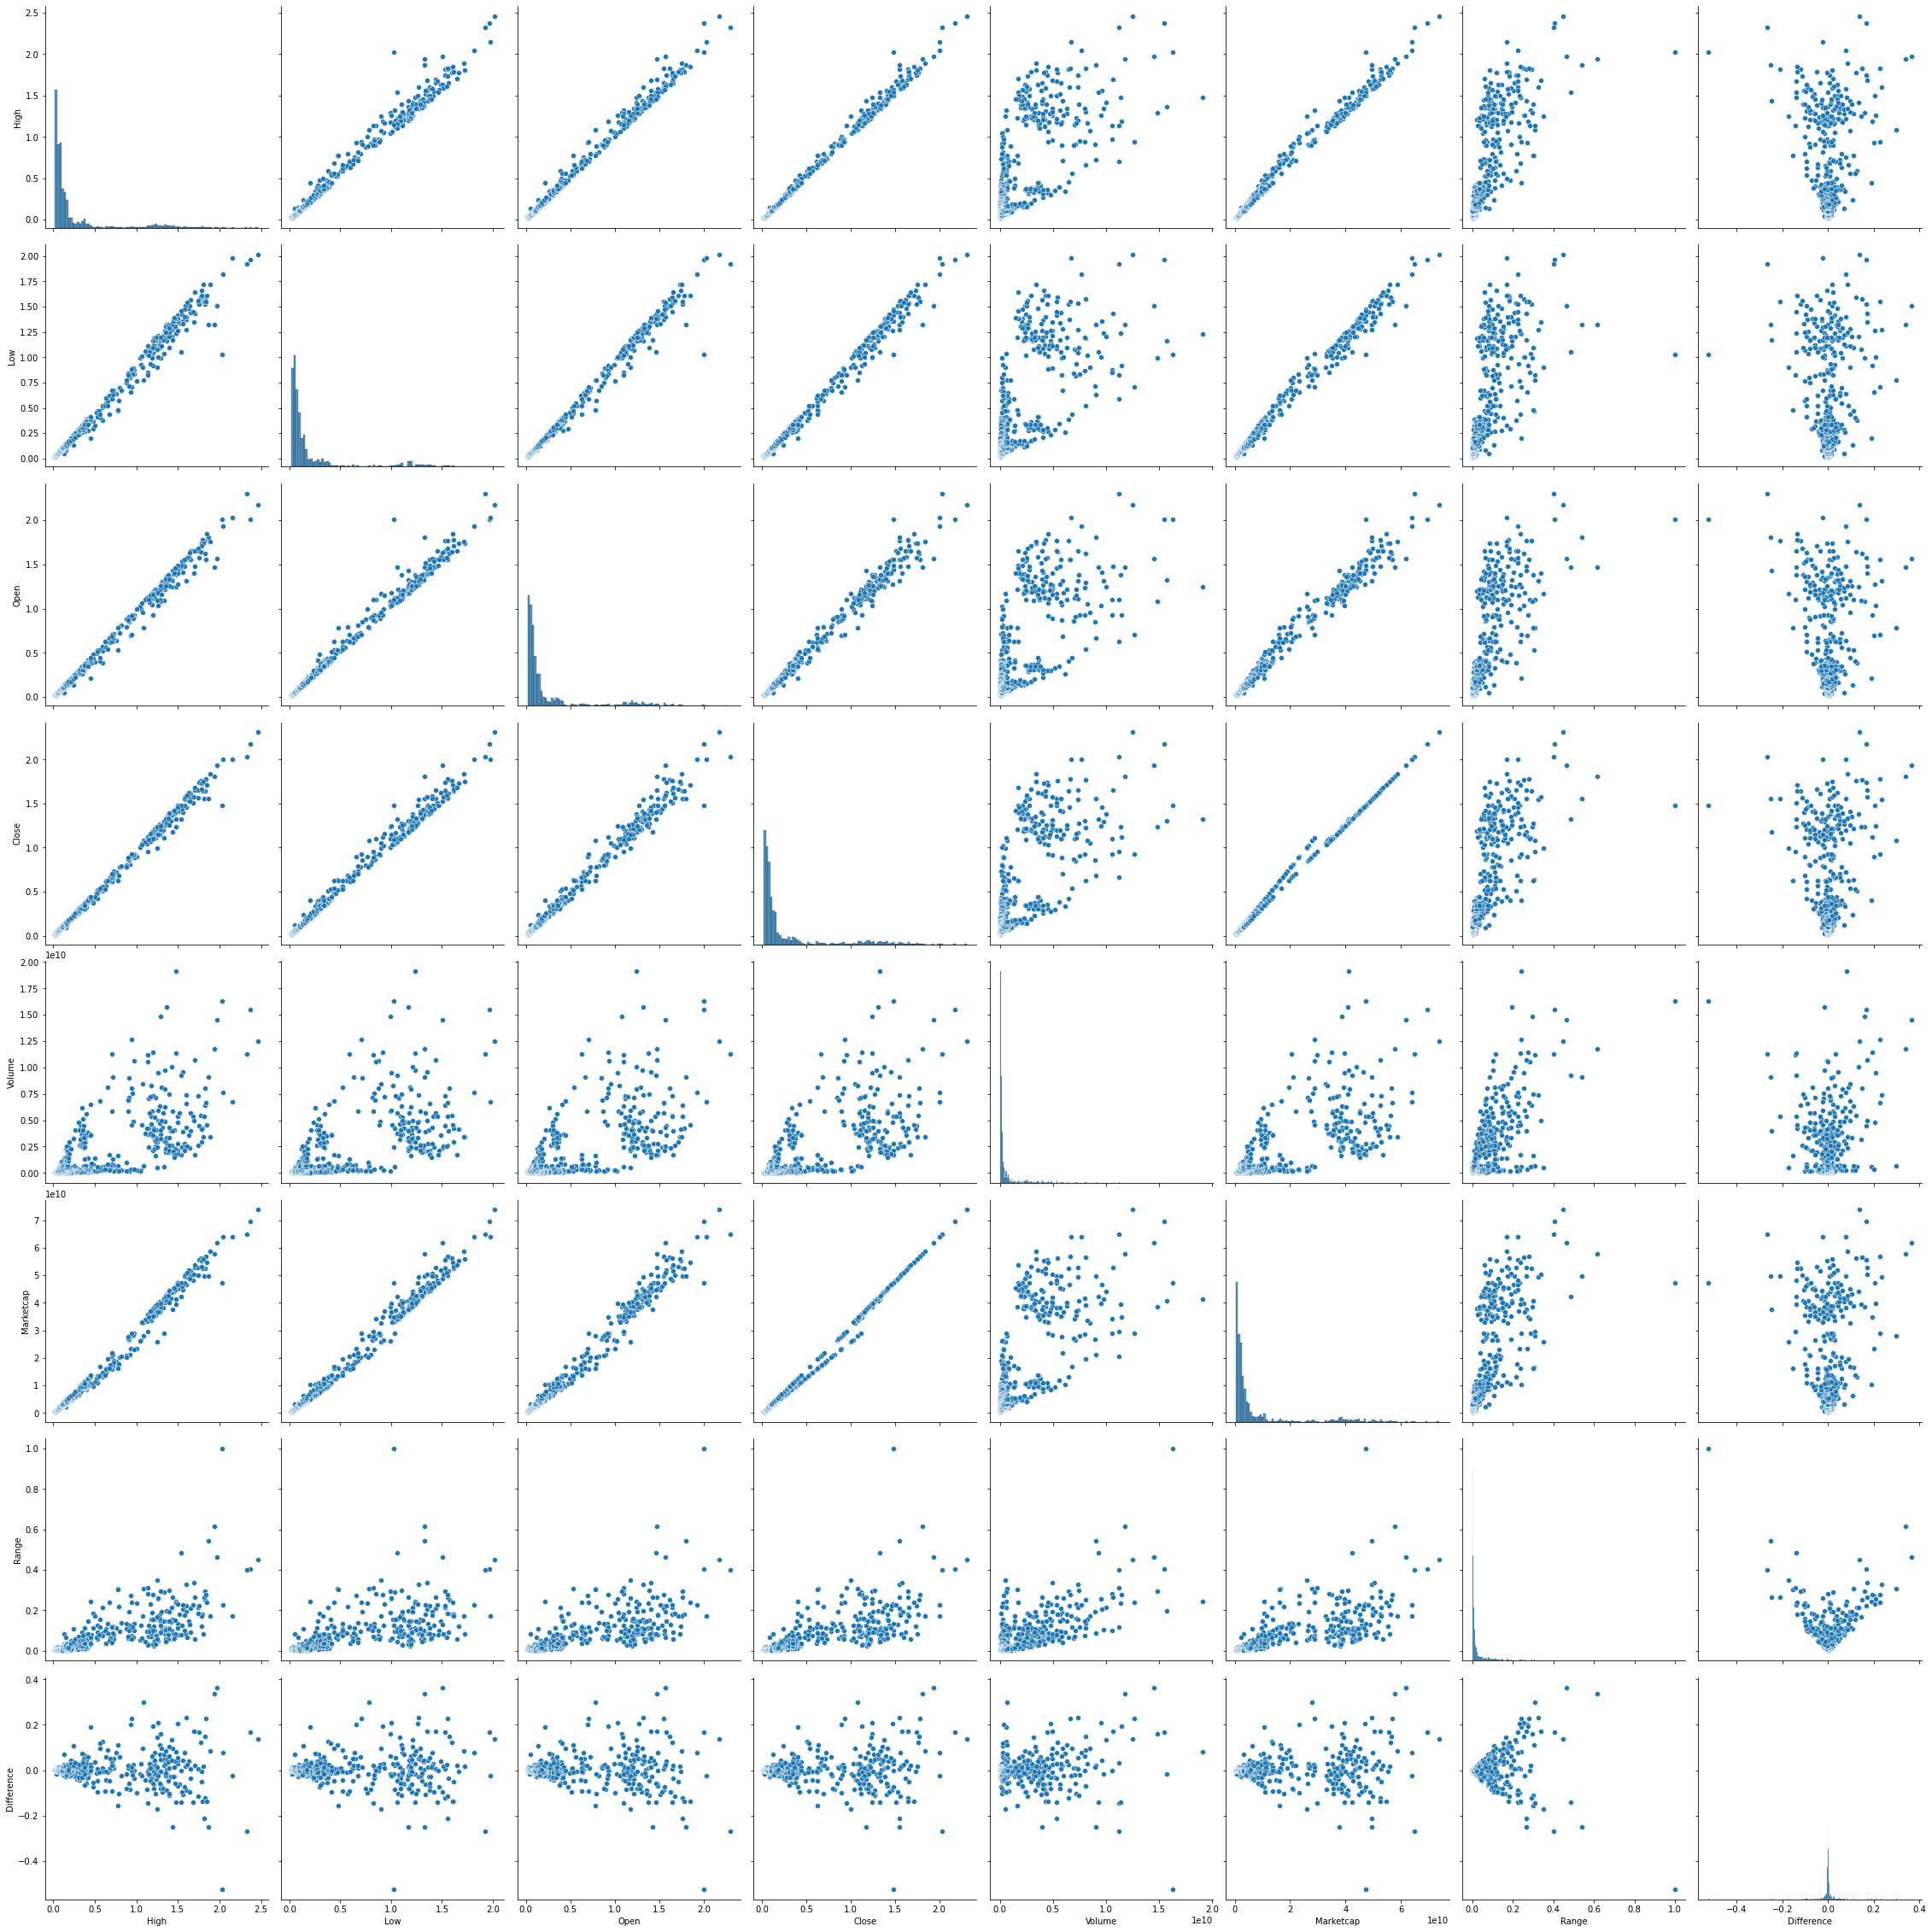

In [16]:
sns.pairplot(data,height=4);
